# LAYOFFS ANALYSIS

The data availability is from when COVID-19 was declared as a pandemic i.e. 11 March 2020 to 14 February 2023.

# DATA PREPERATION

In [139]:
import pandas as pd
df=pd.read_csv("layoffs.csv")

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
df.shape

(2414, 9)

In [142]:
df.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [143]:
df.head(6)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Just Eat,London,Food,1700.0,NaN,21-03-2023,Acquired,United Kingdom,NaN
1,Marvell,SF Bay Area,Hardware,320.0,0.04,21-03-2023,Post-IPO,United States,NaN
2,Workhuman,Dublin,HR,130.0,0.10,21-03-2023,Unknown,Ireland,131.0
3,FreshBooks,Toronto,Finance,80.0,0.10,21-03-2023,Unknown,Canada,331.0
4,Xing,Hamburg,HR,68.0,NaN,21-03-2023,Series A,Germany,NaN
5,Mr Yum,Melbourne,Food,40.0,NaN,21-03-2023,Series A,Australia,101.0


In [144]:
df.tail()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
2409,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,13-03-2020,Unknown,United States,45.0
2410,Panda Squad,SF Bay Area,Consumer,6.0,0.75,13-03-2020,Seed,United States,1.0
2411,Tamara Mellon,Los Angeles,Retail,20.0,0.40,12-03-2020,Series C,United States,90.0
2412,EasyPost,Salt Lake City,Logistics,75.0,NaN,11-03-2020,Series A,United States,12.0
2413,Blackbaud,Charleston,Other,500.0,0.14,NaN,Post-IPO,United States,NaN


In [145]:
df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1653.000000,1605.000000,2193.000000
mean,247.580157,0.257967,826.303828
std,828.240611,0.256444,5568.453605
min,3.000000,0.000000,0.000000
25%,36.000000,0.100000,50.000000
50%,80.000000,0.170000,157.000000
75%,180.000000,0.300000,447.000000
max,12000.000000,1.000000,121900.000000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2414 non-null   object 
 1   location             2414 non-null   object 
 2   industry             2412 non-null   object 
 3   total_laid_off       1653 non-null   float64
 4   percentage_laid_off  1605 non-null   float64
 5   date                 2413 non-null   object 
 6   stage                2408 non-null   object 
 7   country              2414 non-null   object 
 8   funds_raised         2193 non-null   float64
dtypes: float64(3), object(6)
memory usage: 169.9+ KB


In [147]:
groups = df.groupby(['industry', 'company'])
groups.size()

industry      company    
Aerospace     AirMap         1
              Astra          2
              Kitty Hawk     2
              OneWeb         1
Construction  Bridgit        1
                            ..
Travel        Tripbam        1
              Trivago        1
              Vacasa         2
              WanderJaunt    2
              WhyHotel       1
Length: 1949, dtype: int64

# DATA CLEANING

In [148]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [149]:
df.isnull().sum()

company                  0
location                 0
industry                 2
total_laid_off         761
percentage_laid_off    809
date                     1
stage                    6
country                  0
funds_raised           221
dtype: int64

In [150]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Just Eat,London,Food,1700.0,NaN,21-03-2023,Acquired,United Kingdom,NaN
1,Marvell,SF Bay Area,Hardware,320.0,0.04,21-03-2023,Post-IPO,United States,NaN
2,Workhuman,Dublin,HR,130.0,0.10,21-03-2023,Unknown,Ireland,131.0
3,FreshBooks,Toronto,Finance,80.0,0.10,21-03-2023,Unknown,Canada,331.0
4,Xing,Hamburg,HR,68.0,NaN,21-03-2023,Series A,Germany,NaN
...,...,...,...,...,...,...,...,...,...
2409,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,13-03-2020,Unknown,United States,45.0
2410,Panda Squad,SF Bay Area,Consumer,6.0,0.75,13-03-2020,Seed,United States,1.0
2411,Tamara Mellon,Los Angeles,Retail,20.0,0.40,12-03-2020,Series C,United States,90.0
2412,EasyPost,Salt Lake City,Logistics,75.0,NaN,11-03-2020,Series A,United States,12.0


In [151]:
df = df.fillna(0)
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Just Eat,London,Food,1700.0,0.00,21-03-2023,Acquired,United Kingdom,0.0
1,Marvell,SF Bay Area,Hardware,320.0,0.04,21-03-2023,Post-IPO,United States,0.0
2,Workhuman,Dublin,HR,130.0,0.10,21-03-2023,Unknown,Ireland,131.0
3,FreshBooks,Toronto,Finance,80.0,0.10,21-03-2023,Unknown,Canada,331.0
4,Xing,Hamburg,HR,68.0,0.00,21-03-2023,Series A,Germany,0.0
...,...,...,...,...,...,...,...,...,...
2409,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,13-03-2020,Unknown,United States,45.0
2410,Panda Squad,SF Bay Area,Consumer,6.0,0.75,13-03-2020,Seed,United States,1.0
2411,Tamara Mellon,Los Angeles,Retail,20.0,0.40,12-03-2020,Series C,United States,90.0
2412,EasyPost,Salt Lake City,Logistics,75.0,0.00,11-03-2020,Series A,United States,12.0


In [152]:
df['date'] = pd.to_datetime(df['date'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 2413
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              2413 non-null   object        
 1   location             2413 non-null   object        
 2   industry             2413 non-null   object        
 3   total_laid_off       2413 non-null   float64       
 4   percentage_laid_off  2413 non-null   float64       
 5   date                 2413 non-null   datetime64[ns]
 6   stage                2413 non-null   object        
 7   country              2413 non-null   object        
 8   funds_raised         2413 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 188.5+ KB


In [154]:
df[df.duplicated()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised


# DATA VISUALIZATION

In [155]:
#number of layoffs in each country
df['country'].value_counts() 

United States           1573
India                    152
Canada                   105
Brazil                    76
United Kingdom            75
Germany                   69
Australia                 55
Israel                    55
Singapore                 34
Indonesia                 26
Sweden                    20
China                     18
Nigeria                   15
Netherlands               13
France                     8
Kenya                      6
United Arab Emirates       6
Argentina                  6
Ireland                    6
New Zealand                6
Colombia                   5
Hong Kong                  5
Estonia                    5
Denmark                    4
Mexico                     4
Seychelles                 4
Norway                     4
Austria                    4
Finland                    4
Switzerland                3
Portugal                   3
Vietnam                    3
Spain                      3
Malaysia                   3
Luxembourg    

In [156]:
top_companies = df.nlargest(15,['total_laid_off'])
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

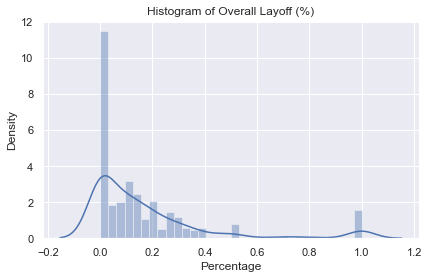

In [157]:
sns.set()
sns.distplot(df['percentage_laid_off'])
plt.xlabel('Percentage')
plt.ylabel('Density')
plt.title('Histogram of Overall Layoff (%)')
plt.show()


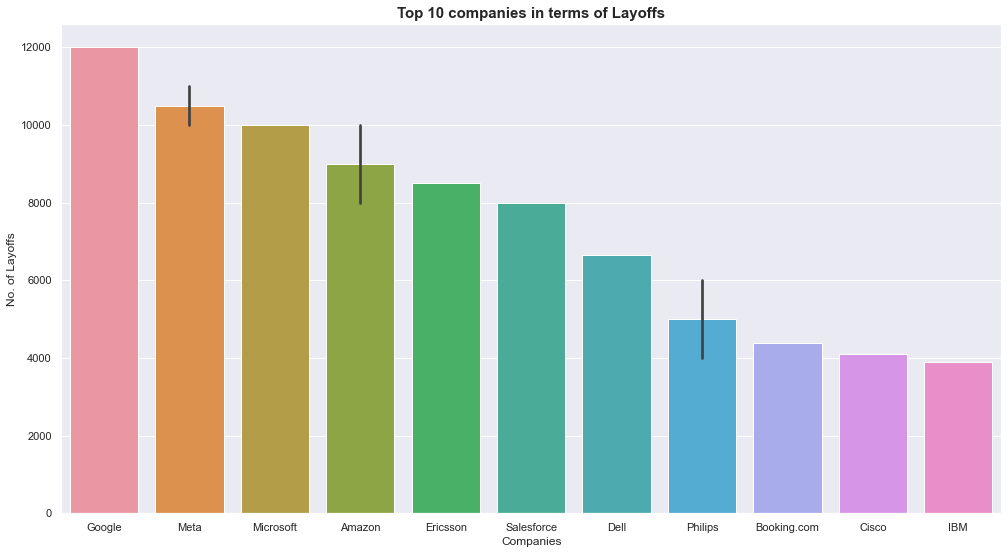

In [158]:
plt.figure(figsize=(15,9))
sns.barplot(x=top_companies.company, y=top_companies.total_laid_off)
plt.title("Top 10 companies in terms of Layoffs", fontsize=15, fontweight='bold')
plt.xlabel("Companies")
plt.ylabel("No. of Layoffs")
plt.show()

<AxesSubplot:title={'center':'Yearly layoffs in various industries world wide'}, xlabel='industry', ylabel='total_laid_off'>

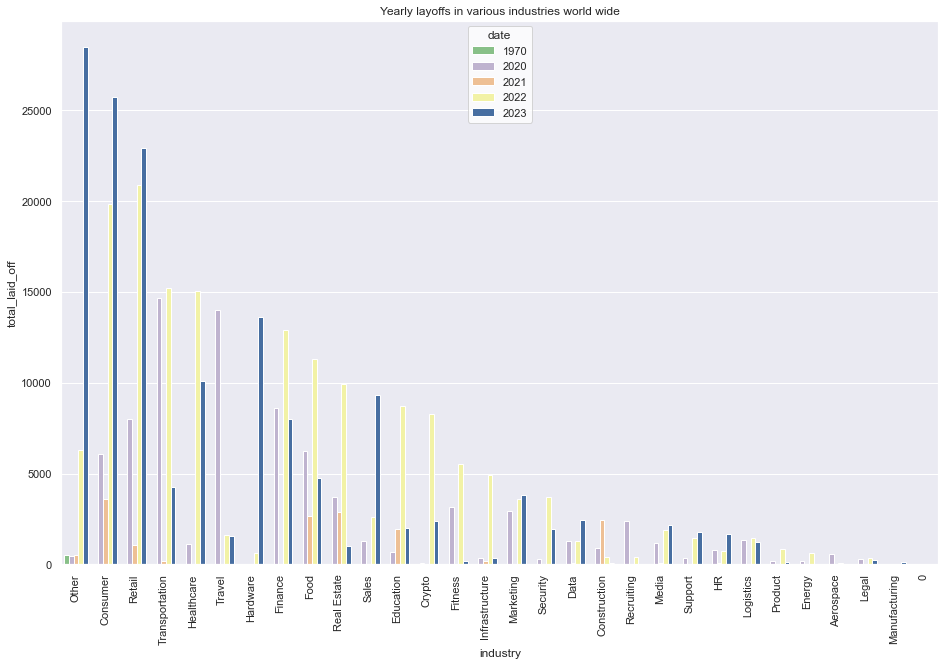

In [159]:
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
df_industry = df.groupby([ df.industry, df.date.dt.year]).sum()
# df_industry.sort_values(by=['total_laid_off','date'], ascending=False)
df_industry = df_industry.reset_index()
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title("Yearly layoffs in various industries world wide")
sns.set(style="white", palette="Accent", color_codes=True)
sns.barplot(data=df_industry.sort_values(by=['total_laid_off','date'], ascending=False), x="industry", y="total_laid_off", hue="date")

In [160]:
import plotly.express as px
top_10 = df.groupby('country').sum().reset_index().sort_values(by='total_laid_off',ascending=False)[['country','total_laid_off']].head(10)
px.pie(top_10,names='country',values='total_laid_off',
      color_discrete_sequence=px.colors.sequential.thermal,
       title='Top 10 Countries where most layoffs happened')

In [161]:
import plotly.express as px
figure = px.bar(df, x=df["industry"], 
                y = df["total_laid_off"], 
                color = df["total_laid_off"],
            title="Industrywise Layoff")
figure.show()

In [162]:
figure = px.bar(df, x=df["industry"],
            title="Industrywise Layoff")
figure.show()

In [163]:
df1 = df.set_index('date')
df_2022 = df1.loc[:'2022']
df_2021 = df1.loc[(df1.index > '2021-01-01')&(df1.index < '2022-01-01')]
df_2020 = df1.loc[(df1.index > '2020-01-01')&(df1.index < '2021-01-01')]

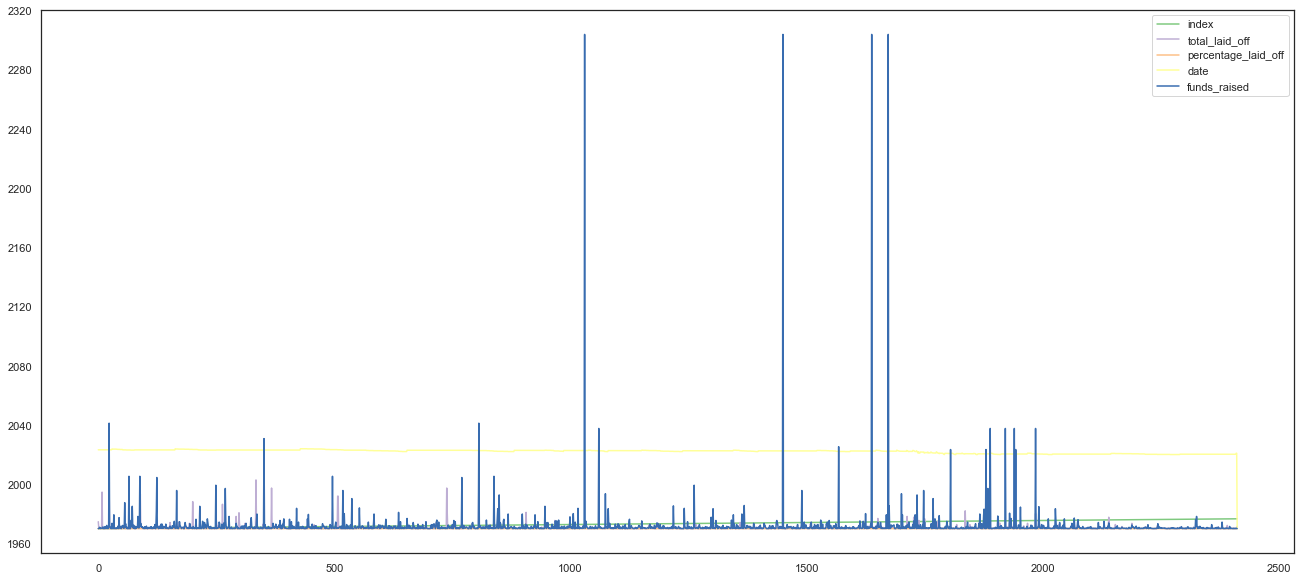

In [164]:
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(ax=ax)
plt.show()

In [165]:
figure = px.scatter( data_frame = df,x="percentage_laid_off",
                    y="total_laid_off", size="percentage_laid_off", trendline="ols", 
                    title= "Relationship Between Total and Percentage Layoff")
figure.show()
#There is a linear relationship. It means that Virat Kohli likes playing fours. The more runs he scores in the innings, the more fours he plays.

TypeError: can't multiply sequence by non-int of type 'float'

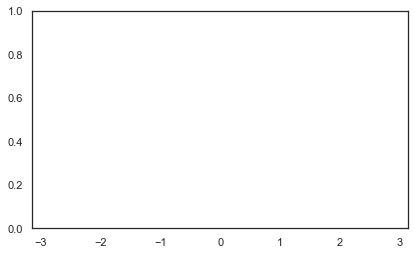

In [168]:
from pandas.plotting import andrews_curves
andrews_curves(df.drop("total_laid_off", axis=1), "industry")